Lab 05 - Clusterização

Thais Damasceno Silva - 11721BCC007

In [ ]:
# Instalar pacote opemml
!pip install openml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.9 MB/s eta 0:00:00


1) Carregue o dataset de sementes de trigo do site OpenML (formato ARFF).
Normalize os dados:  https://www.openml.org/d/1499

 1) Aplique agrupamento k-Means (usando sklearn.cluster.KMeans) supondo 3 grupos e pontos centrais iniciais aleatórios.

Cluster_3
2    72
1    71
0    67


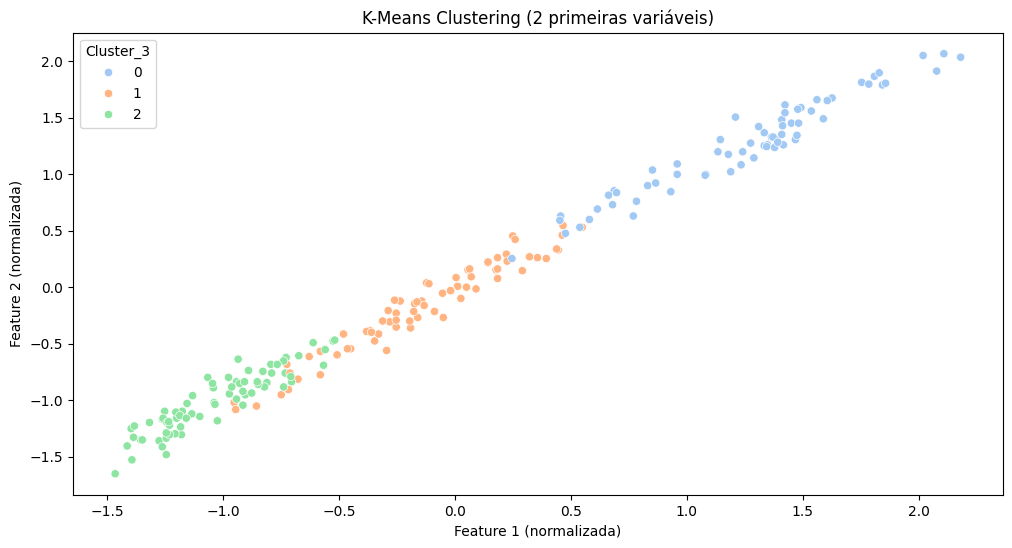

In [ ]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo ARFF
data, meta = arff.loadarff('seeds.arff')
df = pd.DataFrame(data)

# Converter colunas byte-string para string padrão (caso classe seja categórica)
df[df.columns[-1]] = df[df.columns[-1]].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Separar atributos e normalizar
X = df.iloc[:, :-1]  # Remove a última coluna (classe original)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar K-Means com 3 clusters e inicialização aleatória
kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
kmeans.fit(X_normalized)

# Adicionar os rótulos ao DataFrame
df['Cluster_3'] = kmeans.labels_

# Resultados
print(df['Cluster_3'].value_counts().to_string())

# Visualização (usando 2 primeiras variáveis)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_normalized[:, 0], y=X_normalized[:, 1], hue=df['Cluster_3'], palette='pastel')
plt.title("K-Means Clustering (2 primeiras variáveis)")
plt.xlabel("Feature 1 (normalizada)")
plt.ylabel("Feature 2 (normalizada)")
plt.show()

2) Discuta a escolha dos centroides.

**R:**
A escolha dos centroides iniciais no K-Means é um passo crucial, pois o algoritmo é sensível à inicialização. No código, o parâmetro *init='random'* escolhe os centroides de forma **aleatória** entre os dados. Pode funcionar bem, mas também pode levar a diferentes soluções em execuções diferentes, especialmente se os dados não forem bem separados ou tiverem muitos ruídos.

- **Aleatoriedade e convergência**: Ao usar *init='random'*, cada execução do algoritmo pode começar com diferentes pontos iniciais, o que pode fazer com que o algoritmo:
  - Converja para mínimos locais (ou seja, soluções que não são ideais);
  - Encontre diferentes agrupamentos para o mesmo conjunto de dados;
  - Gere resultados inconsistentes entre execuções.

- **Parâmetro *n_init=10*** : Essa escolha ajuda a minimizar o problema da aleatoriedade. O K-Means será executado 10 vezes com diferentes centroides aleatórios, e o modelo com a menor soma dos quadrados intra-cluster (inertia) será escolhido como solução final. Isso aumenta a chance de obter uma boa solução.

 3) Faça o mesmo agrupamento, agora supondo 4 grupos.

Cluster_4
0    65
3    64
2    51
1    30




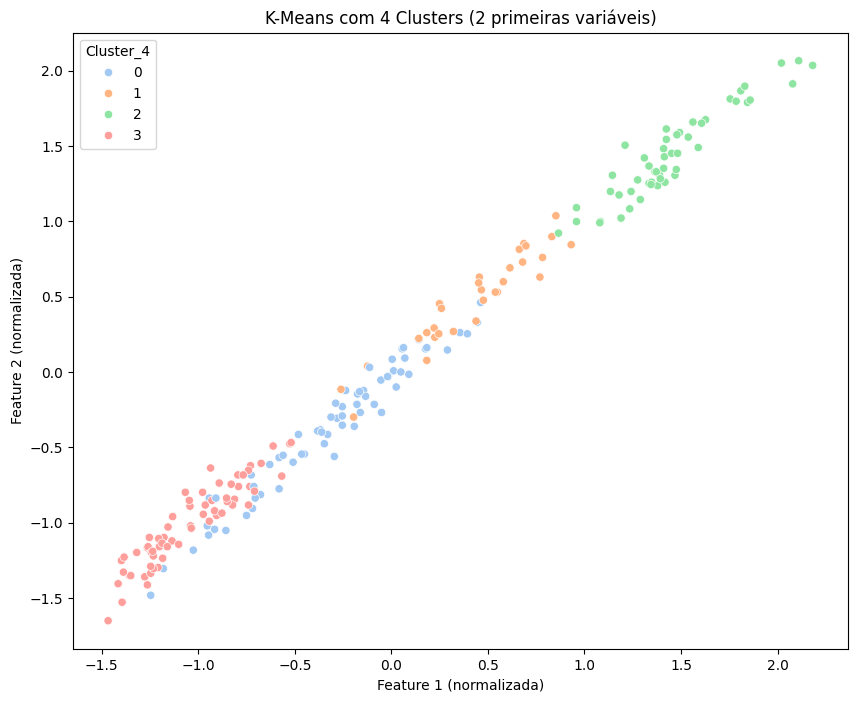

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar KMeans com 4 clusters e inicialização aleatória
kmeans_4 = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans_4.fit(X_normalized)

# Adiciona os rótulos dos clusters ao DataFrame
df['Cluster_4'] = kmeans_4.labels_

# Ver distribuição dos clusters
print(df['Cluster_4'].value_counts().to_string())
print("\n")

# Visualização com as 2 primeiras variáveis
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_normalized[:, 0], y=X_normalized[:, 1], hue=df['Cluster_4'], palette='pastel')
plt.title("K-Means com 4 Clusters (2 primeiras variáveis)")
plt.xlabel("Feature 1 (normalizada)")
plt.ylabel("Feature 2 (normalizada)")
plt.show()

4) Compare a cardinalidade, magnitude, coesão e separação de agrupamentos em 3
e 4 grupos e determine qual número de grupos é melhor.

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score


# Cardinalidade (quantidade de pontos em cada cluster)
card_3 = df['Cluster_3'].value_counts().to_string()
card_4 = df['Cluster_4'].value_counts().to_string()

# Magnitude dos centróides: distância até a origem
mag_3 = np.linalg.norm(kmeans.cluster_centers_, axis=1)
mag_4 = np.linalg.norm(kmeans_4.cluster_centers_, axis=1)

print("Magnitude dos centróides")
print("3 grupos:", mag_3)
print("4 grupos:", mag_4)
print("\n")

# Coesão: Inércia (soma das distâncias quadradas até o centróide)
inertia_3 = kmeans.inertia_
inertia_4 = kmeans_4.inertia_

print("Cardinalidade")
print("3 grupos:\n", card_3)
print("\n4 grupos:\n", card_4)

print("\nCoesão (Inércia)")
print(f"3 grupos: {inertia_3:.2f}")
print(f"4 grupos: {inertia_4:.2f}")

# Separação: média das distâncias entre centróides
def centroid_separation(centers):
    return pdist(centers).mean()

sep_3 = centroid_separation(kmeans.cluster_centers_)
sep_4 = centroid_separation(kmeans_4.cluster_centers_)

print("\nSeparação (distância média entre centróides)")
print(f"3 grupos: {sep_3:.2f}")
print(f"4 grupos: {sep_4:.2f}")

score_3 = silhouette_score(X_normalized, kmeans.labels_)
score_4 = silhouette_score(X_normalized, kmeans_4.labels_)

print("\nSilhouette Score")
print(f"3 grupos: {score_3:.3f}")
print(f"4 grupos: {score_4:.3f}")

Magnitude dos centróides
3 grupos: [2.83677032 1.04826198 2.42141958]
4 grupos: [1.3818224  1.05466006 3.24696203 2.51138693]


Cardinalidade
3 grupos:
 Cluster_3
2    72
1    71
0    67

4 grupos:
 Cluster_4
0    65
3    64
2    51
1    30

Coesão (Inércia)
3 grupos: 430.66
4 grupos: 371.18

Separação (distância média entre centróides)
3 grupos: 3.73
4 grupos: 3.40

Silhouette Score
3 grupos: 0.401
4 grupos: 0.335


 Análise comparativa entre os modelos com 3 e 4 grupos:

 - Coesão (Inércia): o modelo com 4 grupos possui menor inércia (371.18) do que o com 3 grupos (430.66),
   indicando que os pontos estão mais próximos dos centróides. No entanto, menor inércia não garante melhor agrupamento.

 - Separação: a separação média entre centróides é maior no modelo com 3 grupos (3.73) em comparação com 4 grupos (3.40),
   o que indica melhor distinção entre os clusters no modelo com 3.

 - Silhouette Score: o modelo com 3 grupos tem uma pontuação maior (0.401 vs 0.335), sugerindo melhor qualidade geral
   do agrupamento — ou seja, os clusters estão mais compactos e bem separados.

 - Cardinalidade: os clusters no modelo com 3 grupos têm tamanhos mais equilibrados (72, 71, 67),
   enquanto o modelo com 4 grupos apresenta um cluster pequeno (30), o que pode indicar overfitting.

**Conclusão:** apesar da menor inércia no modelo com 4 clusters, o modelo com 3 grupos é preferível,
 pois apresenta melhor separação, maior índice de Silhouette e distribuição mais equilibrada entre os clusters.


5) Realize agrupamento hierárquico (usando sklearn.cluster.AgglomerativeClustering
ou scipy.cluster.hierarchy.linkage) e plote o dendrograma dele.

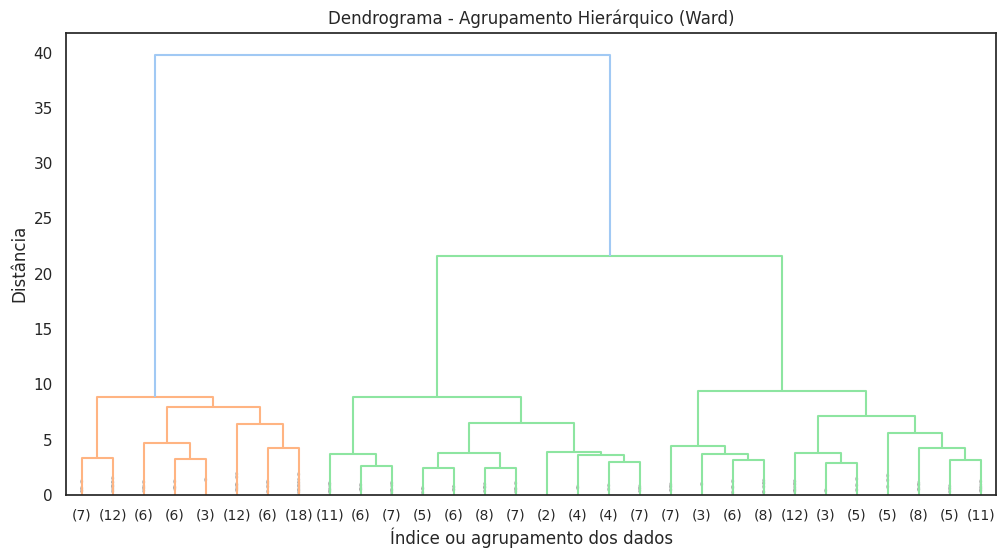

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração da paleta de cores da biblioteca seaborn
sns.set(style="white", palette="pastel")

# Calcula as ligações entre os pontos com método 'ward' (minimiza variância intra-cluster)
Z = linkage(X_normalized, method='ward')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=0., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Agrupamento Hierárquico (Ward)")
plt.xlabel("Índice ou agrupamento dos dados")
plt.ylabel("Distância")
plt.show()